In [3]:
!pip install pyswarms
import warnings as warn
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
warn.filterwarnings('ignore')
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=100)


2020-10-22 21:53:55,593 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.44e-8
2020-10-22 21:53:55,673 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.441378486407465e-08, best pos: [-9.34317833e-05  1.60263180e-04]


2020-10-22 21:54:29,107 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.44e-8
2020-10-22 21:54:29,202 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.4388850224581174e-08, best pos: [8.23242183e-05 2.18200764e-04]


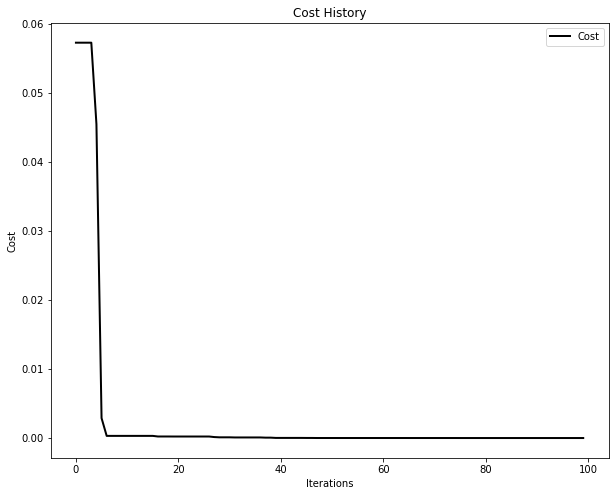

In [4]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
%matplotlib inline
# Set-up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()


2020-10-22 21:54:55,827 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-10-22 21:54:55,828 - matplotlib.animation - INFO - MovieWriter._run: running command: 'C:\Program Files\ImageMagick-7.0.10-Q16-HDRI\magick.exe' -size 720x576 -depth 8 -delay 8.0 -loop 0 rgba:- pso.gif


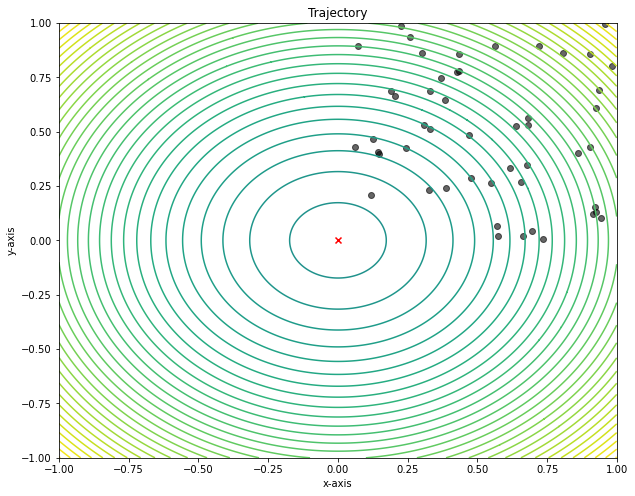

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from pyswarms.utils.plotters.formatters import Mesher, Designer


# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])
anim = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))

# instalar https://imagemagick.org/download/binaries/ImageMagick-7.0.10-34-Q16-HDRI-x64-dll.exe
anim.save('pso.gif', writer='imagemagick')


2020-10-22 21:57:02,230 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-10-22 21:57:02,231 - matplotlib.animation - INFO - MovieWriter._run: running command: 'C:\Program Files\ImageMagick-7.0.10-Q16-HDRI\magick.exe' -size 720x576 -depth 8 -delay 8.0 -loop 0 rgba:- animPSO3d.gif


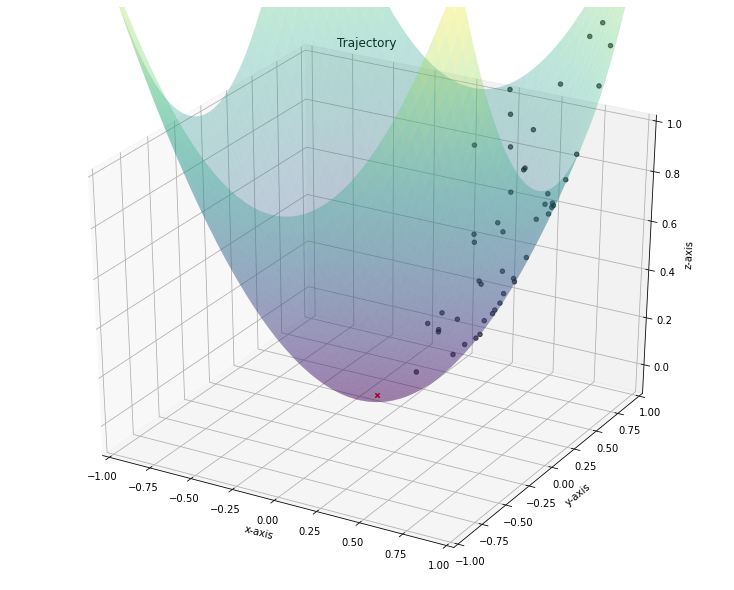

In [6]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from pyswarms.utils.plotters.formatters import Mesher, Designer
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
anim3d = animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))    
anim3d.save('animPSO3d.gif', writer='imagemagick')


In [5]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx

# Set-up choices for the parameters
options = {
    'c1': (1,5),
    'c2': (6,10),
    'w': (2,5),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=40,
            dimensions=20, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

print('best_score', best_score)
print('c1',best_options['c1']) 
print('c2',best_options['c2']) 


2020-10-22 16:57:58,602 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 2.8187961813501166, 'c2': 8.187373751560875, 'w': 3.4132989823033193, 'k': 14, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=4.01
2020-10-22 16:57:58,619 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.012783824811941, best pos: [0.07194392 0.72955074 0.05857187 0.085946   0.71192632 0.36870568
 0.37648595 0.122143   0.65957562 0.32807623 0.44979741 0.05346978
 0.2789067  0.70337804 0.50456003 0.2448393  0.09488194 0.98813256
 0.00749739 0.2114958 ]
2020-10-22 16:57:58,623 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.416045324292705, 'c2': 9.039148008887015, 'w': 2.5149478063688138, 'k': 11, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.68
2020-10-22 16:57:58,636 - pyswarms.single.lo

2020-10-22 16:57:58,847 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.450315362428677, 'c2': 6.575655881999069, 'w': 2.1455579908618203, 'k': 11, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.01
2020-10-22 16:57:58,860 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.01369587712127, best pos: [0.22959354 0.05084396 0.17388886 0.38601807 0.3864695  0.08696006
 0.63509163 0.49993401 0.17261105 0.03938778 0.70160672 0.43433157
 0.04856801 0.23635042 0.64499013 0.41779901 0.26080872 0.6662501
 0.26120663 0.16668645]
2020-10-22 16:57:58,865 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.059690669582828, 'c2': 8.751660333598014, 'w': 3.976740485734213, 'k': 13, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.89
2020-10-22 16:57:58,880 - pyswarms.single.local_

2020-10-22 16:57:59,078 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 1.4423155072764877, 'c2': 9.768562143150776, 'w': 3.99832623364105, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=4.23
2020-10-22 16:57:59,092 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.2283648306247965, best pos: [0.98283972 0.46029369 0.28638539 0.54170273 0.61237383 0.30334846
 0.95239196 0.19948691 0.31569203 0.28301979 0.34342131 0.10009922
 0.10363201 0.30990249 0.28869516 0.55665062 0.40409882 0.01970822
 0.21237868 0.49467372]
2020-10-22 16:57:59,096 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.450147848522105, 'c2': 6.300034839581743, 'w': 4.7817336068159, 'k': 11, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=2.88
2020-10-22 16:57:59,109 - pyswarms.single.local_

2020-10-22 16:57:59,297 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 2.945635822523876, 'c2': 7.821591625021967, 'w': 2.2182127429255947, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=4.11
2020-10-22 16:57:59,310 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.11120511330697, best pos: [0.51035236 0.02123105 0.02971701 0.58913982 0.16837095 0.03053772
 0.98776121 0.19640261 0.19262135 0.24573947 0.33882247 0.7934361
 0.15382648 0.13261032 0.91373875 0.61270078 0.24903253 0.52144299
 0.03980848 0.17289462]
2020-10-22 16:57:59,314 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 3.2743654944755174, 'c2': 7.569553365778258, 'w': 4.604800006326802, 'k': 14, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.96
2020-10-22 16:57:59,327 - pyswarms.single.local

2020-10-22 16:57:59,520 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 3.860055105521969, 'c2': 6.945691604976291, 'w': 2.612549758538007, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=4.05
2020-10-22 16:57:59,534 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.050163773154352, best pos: [9.46085106e-02 2.92243460e-01 1.05997021e-01 1.54234571e-01
 2.77626598e-01 3.01188976e-01 7.83156680e-01 9.31398516e-01
 3.09691568e-01 3.55970111e-01 1.70980413e-04 4.37042107e-01
 3.58425684e-01 4.18865740e-01 1.15048163e-02 2.73130165e-01
 6.54487908e-01 4.22249262e-01 6.38442220e-01 6.82361714e-01]
2020-10-22 16:57:59,538 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 3.890705338320348, 'c2': 7.668725951574597, 'w': 3.81418013333971, 'k': 14, 'p': 1}
pyswarms.single.local_best: 100%|██████████████████████████████████████████████████████

2020-10-22 16:57:59,964 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 3.948036971589726, 'c2': 9.1654540418007, 'w': 4.464641704509612, 'k': 13, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.81
2020-10-22 16:57:59,978 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.8064357125759387, best pos: [0.50974277 0.43610166 0.14444859 0.05245734 0.19168907 0.31002858
 0.36027597 0.56973531 0.84089968 0.20388716 0.10361337 0.43508769
 0.15916447 0.1471979  0.46813156 0.70694832 0.027211   0.85571161
 0.14341415 0.52663397]
2020-10-22 16:57:59,982 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.4213285342179525, 'c2': 6.826315135708457, 'w': 3.829201204893575, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████|10/10, best_cost=3.72
2020-10-22 16:57:59,995 - pyswarms.single.local

best_score 2.6851458711403504
c1 3.912255905146736
c2 8.028734722459768
